## Final Project Submission

Please fill out:
* Student name: James Ngumo
* Student pace:  full time
* Instructor name: Mwikali



## Business understanding

##### That would mean the company wants to minimize risks, optimize investments, ensure safety, and create some sort of competitive advantage in the aviation sector
##### Further, we need to identify the aircraft models with the lowest risk by developing a risk assessment framework that could inform purchasing decisions.
##### This business problem being addressed will go a long way in helping the company make informed decisions on which aircraft to purchase, minimizing possible risks and ensuring successful entry into the aviation industry.

## Data Understanding
#### The data at hand has a lot of missing values which need to be sorted out.
#### There are unnecessary columns that are not needed in achieving our goal. They also need to be eliminated
#### The data is enogh to accomplish our goal.

## Data Cleaning

In [132]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
# Reading the csv file
df=pd.read_csv('data\Aviation_Data.csv')
df.head()

c:\Users\MOJI\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [134]:
#checking the info on our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [135]:

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [136]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [137]:
# Number of rows and columns
df.shape

(90348, 31)

In [138]:
# Checking for missing entries
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [139]:
# Dropping rows with missing value in the Event.Id colmn
df=df.dropna(subset=['Event.Id'])
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [140]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          15230
dtype: i

In [141]:

df['Aircraft.Category'].dropna(inplace=True)
df['Aircraft.Category'].replace('UNK','Unknown', inplace = True)
df['Aircraft.Category'].replace('Unk','Unknown', inplace = True)
df['Aircraft.Category'].unique()


array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

In [142]:
# Droping columns with High number of missing values
columns_to_drop= ['Latitude','Longitude','Airport.Code','Airport.Name','FAR.Description','Schedule','Air.carrier','Broad.phase.of.flight']
df=df.drop(columns=columns_to_drop )

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [143]:
# Display of columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

In [144]:
# Checking for nall values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Report.Status              6381
Publication.Date          15230
dtype: int64

In [145]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Registration.Number     87572 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             81812 non-null

In [146]:
# number of unique values
df['Event.Id'].nunique()

87951

In [147]:
# Dropping unnecessary columns
Drop_columns=['Publication.Date','Report.Status','Registration.Number','Location','Event.Id']
df=df.drop(columns=Drop_columns)

In [148]:
df.shape

(88889, 18)

In [149]:
# DRopping Duplicates
df=df.drop_duplicates('Accident.Number')
df


,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN
90344,Accident,ERA23LA095,2022-12-26,United States,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC
90346,Accident,WPR23LA076,2022-12-26,United States,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN


In [150]:
# checking for unique values
df['Amateur.Built'].unique()



array(['No', 'Yes', nan], dtype=object)

In [151]:
df.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                     226
Injury.Severity             990
Aircraft.damage            3185
Aircraft.Category         56600
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6074
Engine.Type                7057
Purpose.of.flight          6181
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4481
dtype: int64

In [152]:
# Fillinng Measures columns with median
df['Total.Fatal.Injuries']=df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median())
df['Total.Serious.Injuries']=df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median())
df['Total.Minor.Injuries']=df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median())
df['Total.Uninjured']=df['Total.Uninjured'].fillna(df['Total.Uninjured'].median())
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN
90344,Accident,ERA23LA095,2022-12-26,United States,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC
90346,Accident,WPR23LA076,2022-12-26,United States,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN


In [153]:
# Filling categorical columns with unknown
df=df.fillna('Unknown')
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,Unknown,Cessna,501,No,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,Unknown,Unknown,PIPER,PA-28-151,No,Unknown,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown
90344,Accident,ERA23LA095,2022-12-26,United States,Unknown,Unknown,Unknown,BELLANCA,7ECA,No,Unknown,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,Unknown,Personal,0.0,0.0,0.0,1.0,VMC
90346,Accident,WPR23LA076,2022-12-26,United States,Unknown,Unknown,Unknown,CESSNA,210N,No,Unknown,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown


In [154]:
df['Investigation.Type'].unique()

array(['Accident', 'Incident'], dtype=object)

In [155]:
# Dropping duplicates in Accident.Number column
df=df.drop_duplicates('Accident.Number')
df

,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC
3,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,Unknown,Cessna,501,No,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,United States,Minor,Unknown,Unknown,PIPER,PA-28-151,No,Unknown,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown
90344,Accident,ERA23LA095,2022-12-26,United States,Unknown,Unknown,Unknown,BELLANCA,7ECA,No,Unknown,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown
90345,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,Unknown,Personal,0.0,0.0,0.0,1.0,VMC
90346,Accident,WPR23LA076,2022-12-26,United States,Unknown,Unknown,Unknown,CESSNA,210N,No,Unknown,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown


In [156]:
df['Total.Minor.Injuries'].unique()

array([  0.,   1.,   3.,   2.,   4.,  24.,   6.,   5.,  25.,  17.,  19.,
        33.,  14.,   8.,  13.,  15.,   7.,   9.,  16.,  20.,  11.,  12.,
        10.,  38.,  42.,  29.,  62.,  28.,  31.,  39.,  32.,  18.,  27.,
        57.,  50.,  23., 125.,  45.,  26.,  36.,  69.,  21.,  96.,  30.,
        22.,  58., 171.,  65.,  71., 200.,  68.,  47., 380.,  35.,  43.,
        84.,  40.])

In [157]:
df.to_excel('output.xlsx', index=False)

# Data Visualization

### 1.Mean Injuries by Aircraft Make
#### Grouping mean injuries by aircraft Make

In [158]:
make_group = df.groupby('Make').agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()
make_group.head(20)


,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,107.5 Flying Corporation,1.0,0.0,0.0,1.0
1,1200,0.0,1.0,0.0,1.0
2,177MF LLC,0.0,2.0,0.0,0.0
3,1977 Colfer-chan,0.0,0.0,1.0,1.0
4,1st Ftr Gp,1.0,0.0,0.0,0.0
5,2000 Mccoy,1.0,0.0,0.0,1.0
6,2001 Mcgirl,0.0,1.0,0.0,1.0
7,2003 Nash,0.0,0.0,1.0,1.0
8,2007 Savage Air LLC,0.0,0.0,0.0,4.0
9,2021FX3 LLC,0.0,0.0,0.0,2.0


runs on vs.code but shows error on github

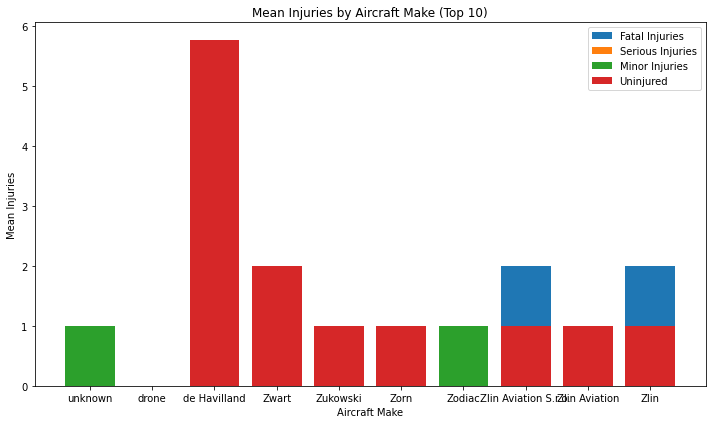

In [176]:
# we first sort

make_group = make_group.sort_values('Make', ascending=False)


fig, ax = plt.subplots(figsize=(10, 6))
# we use the top 10
ax.bar(make_group['Make'].head(10), make_group['Total.Fatal.Injuries'].head(10), label='Fatal Injuries')
ax.bar(make_group['Make'].head(10), make_group['Total.Serious.Injuries'].head(10), label='Serious Injuries')
ax.bar(make_group['Make'].head(10), make_group['Total.Minor.Injuries'].head(10), label='Minor Injuries')
ax.bar(make_group['Make'].head(10), make_group['Total.Uninjured'].head(10), label='Uninjured')

ax.set_title('Mean Injuries by Aircraft Make (Top 10)')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Mean Injuries')

ax.legend()
plt.tight_layout()
plt.savefig('graph1.png')

plt.show()


### Finfings :
##### -de Haviland should be concidered the best option for purchase.It has the highest number of uninjured passengers

### 2.Mean Injuries by Aircraft Model
#### Grouping mean injuries by aircraft Model

In [160]:
#
Model_group = df.groupby('Model').agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()
Model_group

,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,&GCBC,0.0,0.0,0.0,2.0
1,(EX) RV-6,2.0,0.0,0.0,0.0
2,(MODIFIED),1.0,0.0,0.0,0.0
3,(SOLOY CONVERSION),0.0,0.0,0.0,1.0
4,-269C,0.0,0.0,0.0,1.0
...,...,...,...,...,...
12312,lebed,2.0,0.0,0.0,0.0
12313,none,1.0,1.0,0.0,1.0
12314,sportstar,0.0,0.0,0.0,2.0
12315,unk,0.0,1.0,1.0,0.0


In [ ]:
#plot

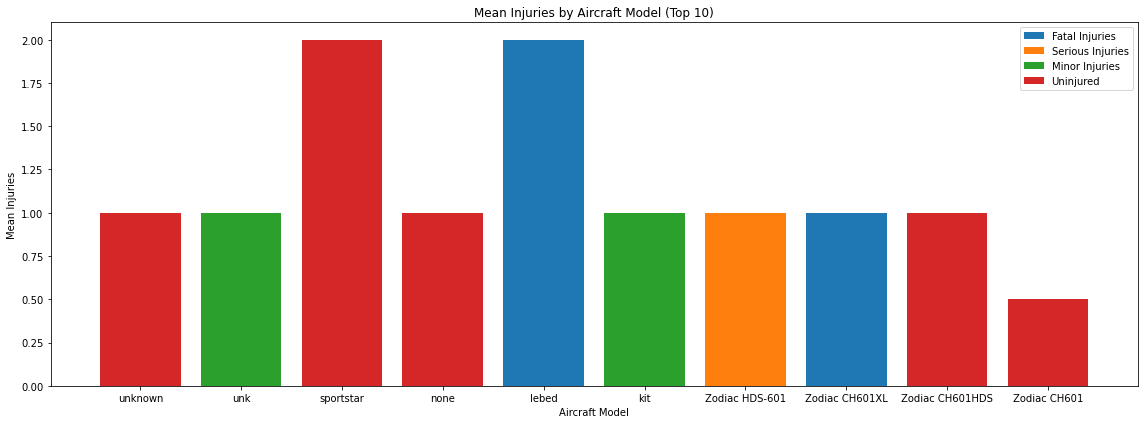

In [161]:
# we first sort

Model_group = Model_group.sort_values('Model', ascending=False)


fig, ax = plt.subplots(figsize=(16, 6))
# we use the top 10
ax.bar(Model_group['Model'].head(10), Model_group['Total.Fatal.Injuries'].head(10), label='Fatal Injuries')
ax.bar(Model_group['Model'].head(10), Model_group['Total.Serious.Injuries'].head(10), label='Serious Injuries')
ax.bar(Model_group['Model'].head(10), Model_group['Total.Minor.Injuries'].head(10), label='Minor Injuries')
ax.bar(Model_group['Model'].head(10), Model_group['Total.Uninjured'].head(10), label='Uninjured')

ax.set_title('Mean Injuries by Aircraft Model (Top 10)')
ax.set_xlabel('Aircraft Model')
ax.set_ylabel('Mean Injuries')

ax.legend()
plt.tight_layout()
plt.savefig('graph2.png')
plt.show()


### Findings :
##### -Sportstar model has the highest number of Uninjured passengers.I would rcomend purchase of this model of an aircraft.

### 3.Weather Condition 
#### Checking for any relation between the weather and the injuries.

In [162]:
# Replacing unk and UNK TO UNKNOWN
df['Weather.Condition'].replace('UNK','Unknown', inplace = True)
df['Weather.Condition'].replace('Unk','Unknown', inplace = True)

In [163]:
# Knowing how the weather impacted the casualties in each aircraft mode.
Weather_group = df.groupby(by=['Weather.Condition']).agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()
Weather_group

,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,IMC,1.978581,0.359438,0.457162,6.758701
1,Unknown,2.288980,0.318093,0.316664,17.709770
2,VMC,0.330504,0.225727,0.297226,3.987838


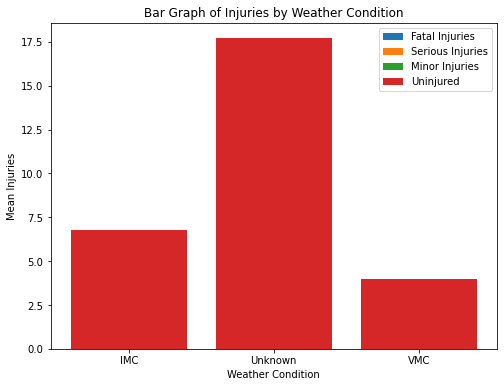

In [164]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(Weather_group['Weather.Condition'], Weather_group['Total.Fatal.Injuries'], label='Fatal Injuries')
ax.bar(Weather_group['Weather.Condition'], Weather_group['Total.Serious.Injuries'], label='Serious Injuries')
ax.bar(Weather_group['Weather.Condition'], Weather_group['Total.Minor.Injuries'], label='Minor Injuries')
ax.bar(Weather_group['Weather.Condition'], Weather_group['Total.Uninjured'], label='Uninjured')

ax.set_title('Bar Graph of Injuries by Weather Condition')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Mean Injuries')

ax.legend()
plt.savefig('graph3.png')
plt.show()


### Findings:
#### The weather does not really affect the number of uninjured passengers.

## 4.Groupping by Ameteur.built

In [165]:
df['Amateur.Built'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [166]:
Amateur_group = df.groupby('Amateur.Built').agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()
Amateur_group

,Amateur.Built,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,No,0.580268,0.241459,0.312255,5.465530
1,Unknown,4.274510,0.558824,0.088235,12.078431
2,Yes,0.372905,0.227992,0.282983,0.910550


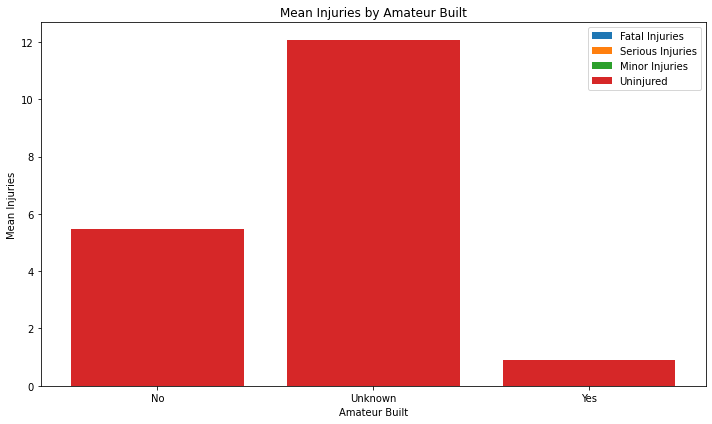

In [167]:
# Plotting a bar graph to understand wether Amature built aircrafts should be considered for purchase

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(Amateur_group['Amateur.Built'], Amateur_group['Total.Fatal.Injuries'], label='Fatal Injuries')
ax.bar(Amateur_group['Amateur.Built'], Amateur_group['Total.Serious.Injuries'], label='Serious Injuries')
ax.bar(Amateur_group['Amateur.Built'], Amateur_group['Total.Minor.Injuries'], label='Minor Injuries')
ax.bar(Amateur_group['Amateur.Built'], Amateur_group['Total.Uninjured'], label='Uninjured')

ax.set_title('Mean Injuries by Amateur Built')
ax.set_xlabel('Amateur Built')
ax.set_ylabel('Mean Injuries')

ax.legend()
plt.tight_layout()
plt.savefig('graph4.png')
plt.show()


### Findings:
##### -Ameteur have the lowest number of uninjured passengers.
##### -Ameture built aircrafts should not be concidered when buying an aircraft.I poses a greater risk to the passengers.

## 5.Country with the most accidents

In [168]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [169]:
# Checking how the aircraft damage of each model relates with the type of injuries
Country_group=df.groupby(['Country']).agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()
Country_group

,Country,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,ATLANTIC OCEAN,3.296296,0.370370,3.209877,57.839506
1,AY,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,9.142857,0.785714,0.214286,15.214286
3,Albania,0.000000,0.000000,0.000000,0.000000
4,Algeria,53.500000,0.500000,0.000000,0.500000
...,...,...,...,...,...
214,West Indies,0.363636,0.090909,1.545455,1.818182
215,Wolseley,1.000000,0.000000,0.000000,0.000000
216,Yemen,0.000000,0.000000,0.000000,0.000000
217,Zambia,5.500000,0.000000,0.000000,0.500000


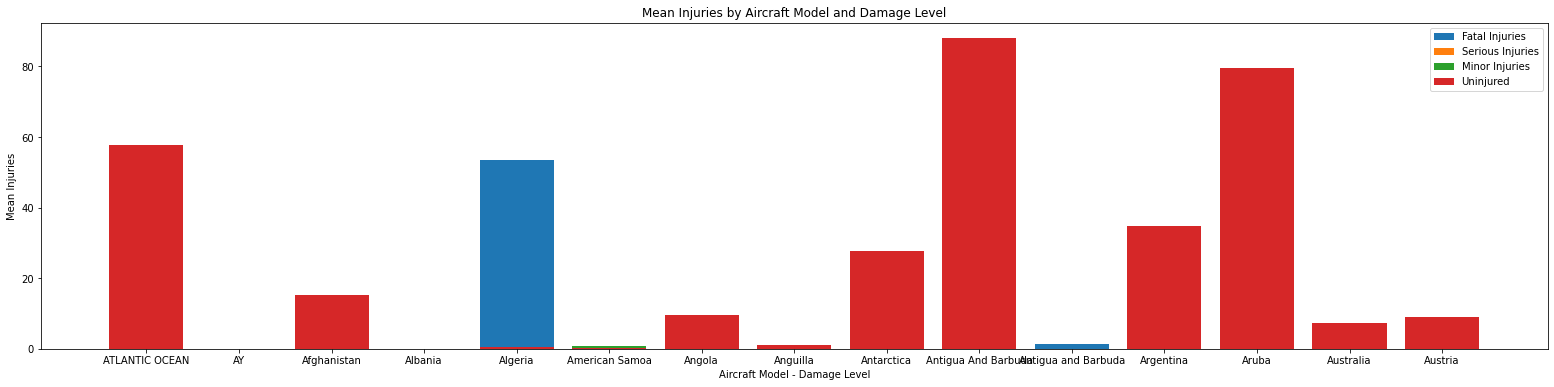

In [170]:
Country_group.sort_values('Country', ascending=False)

fig, ax = plt.subplots(figsize=(27, 6))

#  bar graph for each column
ax.bar(Country_group['Country'].head(15), Country_group['Total.Fatal.Injuries'].head(15), label='Fatal Injuries')
ax.bar(Country_group['Country'].head(15), Country_group['Total.Serious.Injuries'].head(15), label='Serious Injuries')
ax.bar(Country_group['Country'].head(15), Country_group['Total.Minor.Injuries'].head(15), label='Minor Injuries')
ax.bar(Country_group['Country'].head(15), Country_group['Total.Uninjured'].head(15), label='Uninjured')

# title and labels
ax.set_title('Mean Injuries by Aircraft Model and Damage Level')
ax.set_xlabel('Aircraft Model - Damage Level')
ax.set_ylabel('Mean Injuries')

ax.legend()
plt.savefig('graph.png')
# show the plot
plt.show()



### Fndings:
#### Algeria has the highest number of fatal injuries.I would recomend the company not to set its operations in Algeria.

## 6.Which engine type has the highest number of survivors.
#### -Checking which engine to concider when purchasing an aiircraft

In [171]:
df['Engine.Type'].replace('UNK','Unknown', inplace = True)
df['Engine.Type'].replace('NONE','Unknown', inplace = True)
df['Engine.Type'].replace('None','Unknown', inplace = True)
df['Engine.Type'].replace('Unk','Unknown', inplace = True)

In [172]:
df['Engine.Type'].unique()

array(['Reciprocating', 'Unknown', 'Turbo Fan', 'Turbo Shaft',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR'], dtype=object)

In [173]:
# Checking which engene to concider when purchasing an aiircraft
engine_group=df.groupby(['Engine.Type']).agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()
engine_group

,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Electric,0.200000,0.100000,0.000000,0.700000
1,Geared Turbofan,0.000000,0.000000,0.000000,10.083333
2,Hybrid Rocket,1.000000,0.000000,1.000000,0.000000
3,LR,0.000000,10.500000,1.500000,5.500000
4,Reciprocating,0.340050,0.193542,0.249277,1.143617
5,Turbo Fan,1.837969,0.744861,1.364369,85.091495
6,Turbo Jet,1.226174,0.335704,0.519203,48.516358
7,Turbo Prop,0.757299,0.199646,0.265998,5.044235
8,Turbo Shaft,0.469789,0.337306,0.433204,1.422672
9,Unknown,1.846002,0.429244,0.430120,11.024425


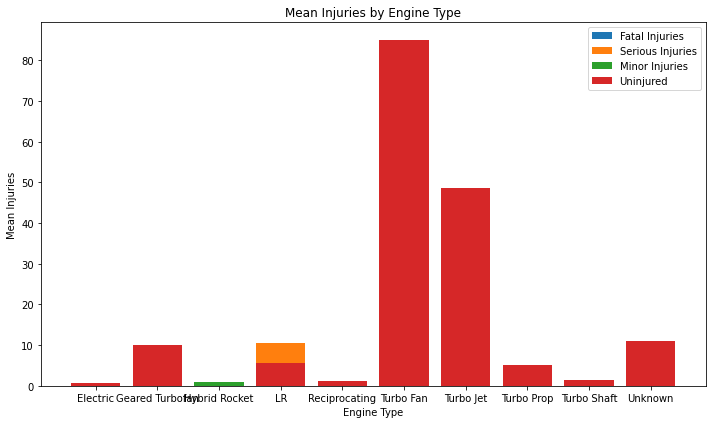

In [174]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(engine_group['Engine.Type'], engine_group['Total.Fatal.Injuries'], label='Fatal Injuries')
ax.bar(engine_group['Engine.Type'], engine_group['Total.Serious.Injuries'], label='Serious Injuries')
ax.bar(engine_group['Engine.Type'], engine_group['Total.Minor.Injuries'], label='Minor Injuries')
ax.bar(engine_group['Engine.Type'], engine_group['Total.Uninjured'], label='Uninjured')

ax.set_title('Mean Injuries by Engine Type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Mean Injuries')

ax.legend()
plt.tight_layout()
plt.savefig('graph6.png')
plt.show()

### Findings:
The bar graph shows that Turbo fan and the tirbo jet are significantly the safest.After having an accident it still managed to have the highest number of uninjured passengers.

## Evaluation
 Based on the above analysis, I have  recommendations for the company as they seek to enter the aircraft operations industry. The analysis yielded key details on the type of aircraft that has less fatal injuries throughout the years.
 However the recommendations drawn from this analysis should be considered alongside other factors like Aicraft price to ensure the company makes the best decision as it ventures into aircraft operation industry.


# Recomendations
##### The following are recommendations drawn from the analysis done:
##### 1.The company should concider purchasing the Sportstar model.It has the highest number of Uninjured passengers which poses a lower risk to the company.
##### 2.The company should concider the purchase of de Haviland make.It has the highest number of uninjured passengers which also poses a lower risk to the company.
#### 3.The engine type to be concidered for purchase is the turbo gun or the turbo jet which are said to have the best perfomance.The analysis above show that they both had the least number of serious and fatal injuries.The analysis also show that the engines have the highest number of uninjured passangers.
##### 4.I'd recomend the company not to set operations in Algeria.Our analysis reveals that Algeria has the highest incidence of accidents, making it a higher-risk location for our operations.